Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_classification(n_classes=2,n_samples=2000, n_features=10,weights=[1,1], random_state=1)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_pred = rf_model.predict_proba(X_test)
roc_auc_score(y_test,y_pred[:,1])


0.979244213824598

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ad_model = AdaBoostClassifier().fit(X_train, y_train)
ypred = ad_model.predict_proba(X_test)
roc_auc_score(y_test,ypred[:,1])

0.9780553117256858

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
ypred = knn.predict_proba(X_test)
roc_auc_score(y_test,ypred[:,1])

0.9610773453038367

In [23]:
m_li = []
for m in [knn,ad_model,rf_model]:
  m_li.append(pd.Series(m.predict_proba(X_test)[:,1]))

pred_comb = pd.concat(m_li,axis=1)
final = pred_comb.mean(axis=1)
roc_auc_score(y_test,final)

0.9783775375281947

In [27]:
fpr, tpr, thresh = roc_curve(y_test,final)
thresh

array([1.85339563, 0.85339563, 0.85113002, 0.85106363, 0.84663757,
       0.84645892, 0.84541541, 0.84530554, 0.84465246, 0.84461271,
       0.84455603, 0.84451038, 0.84244538, 0.84225259, 0.83895327,
       0.83881947, 0.83144439, 0.83125792, 0.82892471, 0.82838243,
       0.79508458, 0.79415469, 0.77945952, 0.77929162, 0.77706288,
       0.77693221, 0.76501592, 0.76498909, 0.74899506, 0.7489103 ,
       0.74693341, 0.74608732, 0.73564731, 0.72949399, 0.72621857,
       0.72492872, 0.70551897, 0.69996112, 0.6351604 , 0.63131613,
       0.60489884, 0.59775274, 0.59682236, 0.58421753, 0.55718225,
       0.51293035, 0.50284125, 0.47364005, 0.46207361, 0.44260672,
       0.43240799, 0.39293115, 0.39081363, 0.33368886, 0.32545826,
       0.2957264 , 0.29459141, 0.27879579, 0.27527948, 0.16599875,
       0.16551838, 0.14252606, 0.14240438, 0.13819695, 0.13792421,
       0.13650199, 0.13585691, 0.13519289, 0.13507104, 0.13341636,
       0.13271612, 0.1155246 , 0.11499255, 0.11391159, 0.11380

In [31]:
from sklearn.metrics import accuracy_score
acc = []
for t in thresh:
  ypred = np.where(final>t,1,0)
  acc.append(accuracy_score(y_test,ypred))

In [35]:
acc_comb = pd.concat([pd.Series(thresh),pd.Series(acc)],axis=1)
acc_comb.columns = ['threshold','accuracy']
acc_comb.sort_values(by='accuracy',ascending=False,inplace=True)
acc_comb.head()

,threshold,accuracy
44,0.557182,0.953333
38,0.635160,0.951667
39,0.631316,0.951667
45,0.512930,0.951667
43,0.584218,0.951667


In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

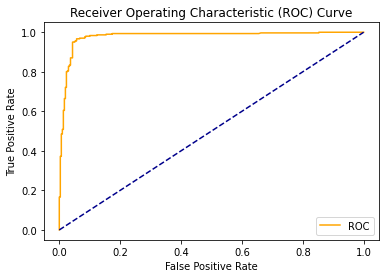

In [37]:
plot_roc_curve(fpr,tpr)